# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

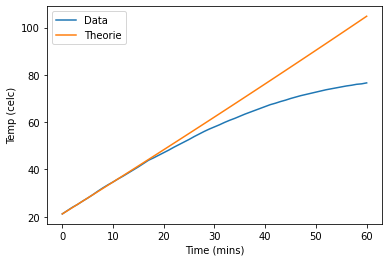

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt(r'tempmetingen.csv', delimiter=';',skiprows=1)
d_time_min = data[:,0]
d_temp_c = data[:,1]

m_beker              = 0.8202 # kg

m_beker_water_start  = 1.2929 # kg
m_water_start = m_beker_water_start - m_beker

m_beker_water_eind   = 1.2749 # kg
m_water_eind = m_beker_water_eind - m_beker

p_time = 5 #min
# Verwachte p van het element: (gebruiken recht deel)
t_dT = d_temp_c[p_time]-d_temp_c[0] #Verandering temp 1e 5 minuten
t_dt = p_time*60                                         #Verandering tijd 1e 5 minuten (in seconden)
t_m = m_water_start     # Massa van het water
c_water = 4186          # Soortelijke warmte van water

Q = t_m * t_dT * c_water    # Q = m * c * dT
P = Q/t_dt                  # P = Q/t

T0 = d_temp_c[0]            # Start temperatuur
def T_verwacht(P,t,mass):
    return T0 + (P*t)/(mass*c_water)

punten = 120                # Aantal punten
dm_water = np.linspace(m_water_start, m_water_eind, 120)
time_array = np.linspace(0, 60, 120)*60

T_verwachtingen = []
for M in range(120):
    T_verwachtingen.append(T_verwacht(P, time_array[M],dm_water[M]))

plt.figure()
plt.plot(d_time_min,d_temp_c, label='Data')
plt.plot(time_array/60,T_verwachtingen, label='Theorie')

plt.xlabel('Time (mins)')
plt.ylabel('Temp (celc)')
plt.legend()
plt.show()



In [21]:
dT_tot = d_temp_c[-1]-d_temp_c[0]
dm = m_water_start-m_water_eind
lat_q = 2.26e6
c_beker = 840

Q_water = lat_q*dm + c_water*dm*(100-d_temp_c[0]) + c_water*m_water_eind*dT_tot
Q_toegevoegd  = P*d_time_min[-1]*60
Q_beker = dT_tot*c_beker*m_beker

print(P)

print(Q_toegevoegd-Q_water,Q_beker)

44.19146246666665
7024.9117999999435 38168.82719999999
